In [44]:
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import pandas as pd

In [45]:
df = pd.read_csv('turnover.csv', engine='python', encoding='latin1')
df

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


In [46]:
X = pd.get_dummies(df.drop(['stag', 'coach', 'greywage', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator'], axis=1))
y = df['event']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

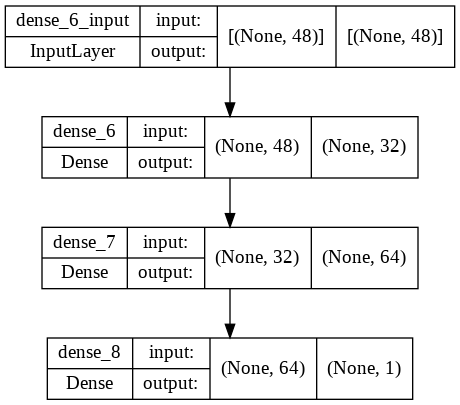

In [48]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [49]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [50]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
29/29 [==============================] - 0s 2ms/step - loss: 0.7441 - accuracy: 0.5293
Epoch 2/20
29/29 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5637
Epoch 3/20
29/29 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.5847
Epoch 4/20
29/29 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.6279
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6523
Epoch 6/20
29/29 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6412
Epoch 7/20
29/29 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7187
Epoch 8/20
29/29 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5703
Epoch 9/20
29/29 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7508
Epoch 10/20
29/29 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.6977
Epoch 11/20
29/29 [

In [51]:
result = model.predict(X_test)
result = [0 if val < 0.5 else 1 for val in result]

In [55]:
i = 0
for i in range(0, 6):
  print(result[i])
  i = i + 1

1
1
1
0
0
0


In [56]:
accuracy_score(y_test, result)

0.9513274336283186

In [57]:
len(X_train.columns)
X_train

,event,age,gender_f,gender_m,industry_ HoReCa,industry_Agriculture,industry_Banks,industry_Building,industry_Consult,industry_IT,...,traffic_friends,traffic_rabrecNErab,traffic_recNErab,traffic_referal,traffic_youjs,head_gender_f,head_gender_m,way_bus,way_car,way_foot
609,1,23.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1121,0,27.0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
376,1,24.0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
973,0,45.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1033,0,31.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,0,45.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
773,0,28.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
377,0,35.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
985,0,31.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
